In [1]:
# Importing necessary libraries
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Provide the file path to your dataset
file_path = "dataset_link_phishing.csv"  # Replace "path/to/your/dataset.csv" with the actual file path

# Load the dataset
df = pd.read_csv(file_path, header=None)


In [3]:
dtype_dict = { 'total_of.': 'int', 'url_length': 'int', 'total_of@': 'int', 'total_of-': 'int', 'total_of%': 'int', 'total_of_www': 'int', 'total_of:': 'int','total_of&':'int','total_of/':'int','total_of*':'int','status':'object'}  # Replace column_name1, column_name2, dtype1, dtype2 with your column names and data types
df = pd.read_csv('dataset_link_phishing.csv', dtype=dtype_dict)

In [4]:
# Suppose your DataFrame is named df
# Check the current column names to identify any leading or trailing whitespaces
print(df.columns)

# Fix column names by removing leading and trailing whitespaces}, inplace=True)
df
df.rename(columns=lambda x: x.strip(), inplace=True)

Index(['Unnamed: 0', 'url', 'url_length', 'hostname_length', 'ip', 'total_of.',
       'total_of-', 'total_of@', 'total_of?', 'total_of&', 'total_of=',
       'total_of_', 'total_of~', 'total_of%', 'total_of/', 'total_of*',
       'total_of:', 'total_of,', 'total_of;', 'total_of$', 'total_of_www',
       'total_of_com', 'total_of_http_in_path', 'https_token',
       'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port',
       'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain',
       'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statist

In [5]:
# Suppose you have a DataFrame called df and you want to delete columns named 'unwanted_column1' and 'unwanted_column2'
unwanted_columns = [ 'url',  'hostname_length', 'ip',
         'total_of?', 'total_of=',
       'total_of_', 'total_of~',
        'total_of,', 'total_of;', 'total_of$',
       'total_of_com', 'total_of_http_in_path', 'https_token',
       'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port',
       'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain',
       'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyperlinks', 'ratio_intHyperlinks',
       'ratio_extHyperlinks', 'ratio_nullHyperlinks', 'nb_extCSS',
       'ratio_intRedirection', 'ratio_extRedirection', 'ratio_intErrors',
       'ratio_extErrors', 'login_form', 'external_favicon', 'links_in_tags',
       'submit_email', 'ratio_intMedia', 'ratio_extMedia', 'sfh', 'iframe',
       'popup_window', 'safe_anchor', 'onmouseover', 'right_clic',
       'empty_title', 'domain_in_title', 'domain_with_copyright',
       'whois_registered_domain', 'domain_registration_length', 'domain_age',
       'web_traffic', 'dns_record', 'google_index', 'page_rank',  ]
df.drop(columns=unwanted_columns, inplace=True)
print("Shape of the dataset:", df.shape)



Shape of the dataset: (6517, 12)


In [6]:
print(df.columns)


Index(['Unnamed: 0', 'url_length', 'total_of.', 'total_of-', 'total_of@',
       'total_of&', 'total_of%', 'total_of/', 'total_of*', 'total_of:',
       'total_of_www', 'status'],
      dtype='object')


In [7]:
# Preprocessing (if necessary)
# For the output column (target variable), if it contains categorical values, encode them using LabelEncoder
le = LabelEncoder()
df['status'] = le.fit_transform(df['status'])

In [8]:
#To show the data type of the dataset
print("\nData Type")
print(df.dtypes)


Data Type
Unnamed: 0      int64
url_length      int64
total_of.       int64
total_of-       int64
total_of@       int64
total_of&       int64
total_of%       int64
total_of/       int64
total_of*       int64
total_of:       int64
total_of_www    int64
status          int64
dtype: object


In [9]:
# Describing the dataset
description = df.describe()

In [10]:
num_rows, num_columns = df.shape
print("Number of rows: " , num_rows)
print("Number of columns: " , num_columns)

Number of rows:  6517
Number of columns:  12


In [11]:
#Display the dataset
print("Dataset: ")
print(df)

Dataset: 
      Unnamed: 0  url_length  total_of.  total_of-  total_of@  total_of&  \
0              0          46          3          0          0          0   
1              1         128         10          0          0          0   
2              2          52          3          0          0          0   
3              3          21          2          0          0          0   
4              4          28          2          0          0          0   
...          ...         ...        ...        ...        ...        ...   
6512        6512          33          2          1          0          0   
6513        6513          33          1          3          0          0   
6514        6514          37          2          0          0          0   
6515        6515          96          3          1          0          0   
6516        6516          20          1          1          0          0   

      total_of%  total_of/  total_of*  total_of:  total_of_www  status  
0   

In [12]:
print(df.isnull().sum())

Unnamed: 0      0
url_length      0
total_of.       0
total_of-       0
total_of@       0
total_of&       0
total_of%       0
total_of/       0
total_of*       0
total_of:       0
total_of_www    0
status          0
dtype: int64


In [13]:
description = df.describe()
print("\nDescription of the dataset:")
print(description)


Description of the dataset:
        Unnamed: 0   url_length    total_of.    total_of-    total_of@  \
count  6517.000000  6517.000000  6517.000000  6517.000000  6517.000000   
mean   3258.000000    60.633574     2.484579     0.987418     0.021175   
std    1881.440184    53.961319     1.370886     2.016163     0.156248   
min       0.000000    13.000000     1.000000     0.000000     0.000000   
25%    1629.000000    33.000000     2.000000     0.000000     0.000000   
50%    3258.000000    47.000000     2.000000     0.000000     0.000000   
75%    4887.000000    71.000000     3.000000     1.000000     0.000000   
max    6516.000000  1386.000000    24.000000    26.000000     4.000000   

         total_of&    total_of%    total_of/    total_of*    total_of:  \
count  6517.000000  6517.000000  6517.000000  6517.000000  6517.000000   
mean      0.166948     0.112168     4.280804     0.000614     1.028234   
std       0.865437     1.027925     1.852865     0.024769     0.242381   
min     

In [14]:
print("\nHead of the dataset:")
print(df.head())


Head of the dataset:
   Unnamed: 0  url_length  total_of.  total_of-  total_of@  total_of&  \
0           0          46          3          0          0          0   
1           1         128         10          0          0          0   
2           2          52          3          0          0          0   
3           3          21          2          0          0          0   
4           4          28          2          0          0          0   

   total_of%  total_of/  total_of*  total_of:  total_of_www  status  
0          0          3          0          1             1       1  
1          0          3          0          1             0       1  
2          0          4          0          1             1       1  
3          0          3          0          1             1       0  
4          0          3          0          1             1       0  


In [15]:
print("\nTail of the dataset:")
print(df.tail())


Tail of the dataset:
      Unnamed: 0  url_length  total_of.  total_of-  total_of@  total_of&  \
6512        6512          33          2          1          0          0   
6513        6513          33          1          3          0          0   
6514        6514          37          2          0          0          0   
6515        6515          96          3          1          0          0   
6516        6516          20          1          1          0          0   

      total_of%  total_of/  total_of*  total_of:  total_of_www  status  
6512          0          3          0          1             0       1  
6513          0          2          0          1             0       1  
6514          0          3          0          1             0       1  
6515          0          7          0          1             0       1  
6516          0          2          0          1             0       2  


In [16]:
df.dropna(inplace=True)
df

,Unnamed: 0,url_length,total_of.,total_of-,total_of@,total_of&,total_of%,total_of/,total_of*,total_of:,total_of_www,status
0,0,46,3,0,0,0,0,3,0,1,1,1
1,1,128,10,0,0,0,0,3,0,1,0,1
2,2,52,3,0,0,0,0,4,0,1,1,1
3,3,21,2,0,0,0,0,3,0,1,1,0
4,4,28,2,0,0,0,0,3,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6512,6512,33,2,1,0,0,0,3,0,1,0,1
6513,6513,33,1,3,0,0,0,2,0,1,0,1
6514,6514,37,2,0,0,0,0,3,0,1,0,1
6515,6515,96,3,1,0,0,0,7,0,1,0,1


In [17]:
X = df[['url_length','total_of@','total_of_www','total_of-','total_of%','total_of/']]
y = df['status']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Initialize and train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [21]:
# Make predictions on the testing set
y_pred = log_reg.predict(X_test_scaled)

In [22]:
# 1. Check the shape and data type of the input data (X_test_scaled)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Data type of X_test_scaled:", type(X_test_scaled))

# 2. Verify that the model (log_reg) is trained by checking its attributes
# For example, you can check if the coefficients are available
if hasattr(log_reg, 'coef_'):
    print("Coefficients of the logistic regression model:")
    print(log_reg.coef_)
else:
    print("The logistic regression model is not trained.")

# 3. Print some sample predictions and compare them with the true labels (y_test)
print("Sample predictions and true labels:")
for i in range(5):  # Print predictions for the first 5 samples
    print("Predicted:", y_pred[i], "\tActual:", y_test.iloc[i])




Shape of X_test_scaled: (1304, 6)
Data type of X_test_scaled: <class 'numpy.ndarray'>
Coefficients of the logistic regression model:
[[-0.69223422 -0.49196142  0.70688443  0.39271967  0.15689808  0.17428474]
 [ 1.03562943  0.47993224 -0.34278167 -0.55851645 -0.12248102  0.47518645]
 [-0.34339522  0.01202918 -0.36410277  0.16579678 -0.03441706 -0.64947119]]
Sample predictions and true labels:
Predicted: 1 	Actual: 0
Predicted: 1 	Actual: 0
Predicted: 0 	Actual: 0
Predicted: 1 	Actual: 1
Predicted: 1 	Actual: 1


In [23]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7661042944785276


In [24]:
# Assuming y_test contains true labels and y_pred contains predicted labels
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       650
           1       0.75      0.79      0.77       654

    accuracy                           0.77      1304
   macro avg       0.77      0.77      0.77      1304
weighted avg       0.77      0.77      0.77      1304



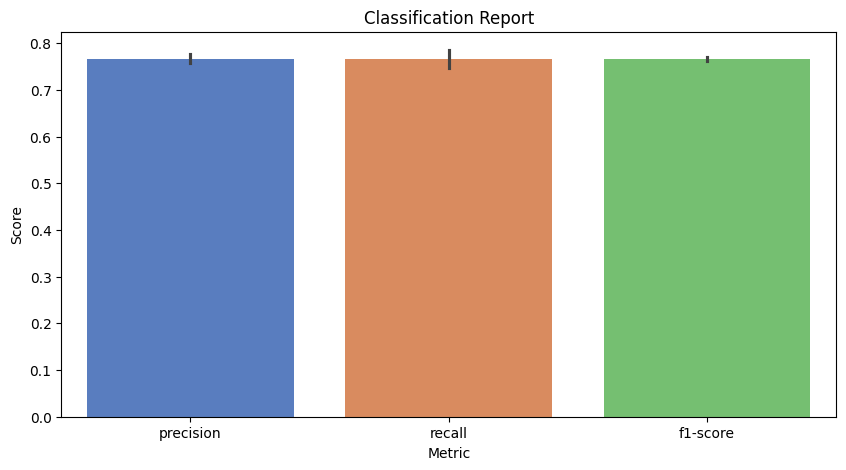

In [25]:


# Assuming y_test contains true labels and y_pred contains predicted labels
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the report dictionary into a DataFrame
df_report = pd.DataFrame(report).transpose()

# Exclude the 'accuracy' row
df_report = df_report.drop('accuracy')

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(data=df_report[['precision', 'recall', 'f1-score']], palette='muted')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Classification Report')
plt.show()


In [27]:
#save the model to a file using pickle
with open('log_reg.pkl','wb') as f:
  pickle.dump(log_reg, f)